In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../data/Social_Network_Ads.csv')

In [6]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
df = df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [8]:
df.sample(5)

,Age,EstimatedSalary,Purchased
74,32,18000,0
10,26,80000,0
119,41,59000,0
325,41,60000,0
200,35,39000,0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=42)

In [10]:
len(X_train),len(X_test),len(y_train),len(y_test)

(280, 120, 280, 120)

## Standard Scaler

In [11]:
class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None
    
    def fit(self,X):
        '''Calculate mean and standard deviation from the dataset'''
        X = np.array(X)
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0)
        return self

    def transform(self,X):
        '''Transform based on the fitted data, i.e using calculated mean and standard deviation'''
        X = np.array(X)
        return (X-self.mean_)/self.std_

In [12]:
# from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train) # fit the scaler to train set to learn the parameters

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled[:5]

array([[-0.84252154,  0.1301563 ],
       [ 0.04175763,  0.2777019 ],
       [ 0.72953032, -1.31579061],
       [ 1.61380949,  1.10395728],
       [ 0.82778356, -1.40431797]])

In [14]:
scaler.mean_

array([3.75750000e+01, 7.05892857e+04])

In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_train_scaled,columns=X_test.columns)
X_train= pd.DataFrame(X_train,columns=X_train.columns)
X_test= pd.DataFrame(X_train,columns=X_test.columns)

In [16]:
X_train_scaled

,Age,EstimatedSalary
0,-0.842522,0.130156
1,0.041758,0.277702
2,0.729530,-1.315791
3,1.613809,1.103957
4,0.827784,-1.404318
...,...,...
275,-1.333788,-1.286281
276,-1.137281,-1.050209
277,0.533024,1.841685
278,0.140011,0.189175


### Comparison between original and scaled data

In [17]:
np.round(X_train.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,70589.0
std,10.0,33949.0
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [18]:
np.round(X_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


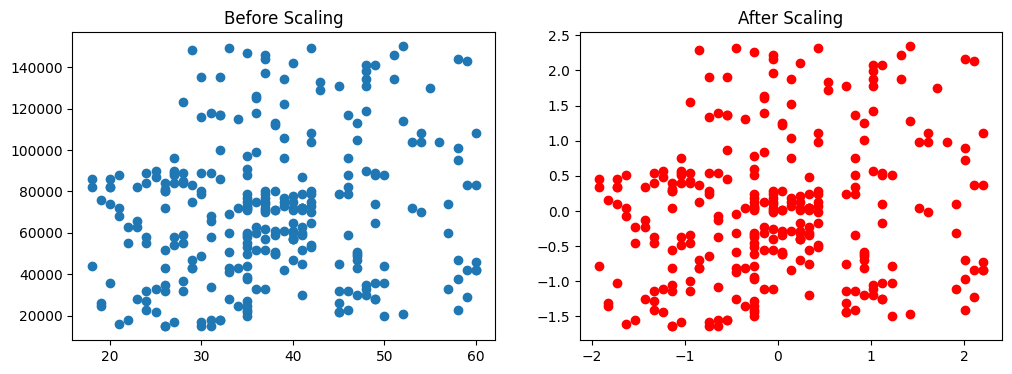

In [20]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,4))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')

plt.show()